<a href="https://colab.research.google.com/github/AMaheshVardhan/Mini-Project-TEAM-6-/blob/main/UpdatedHybridModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


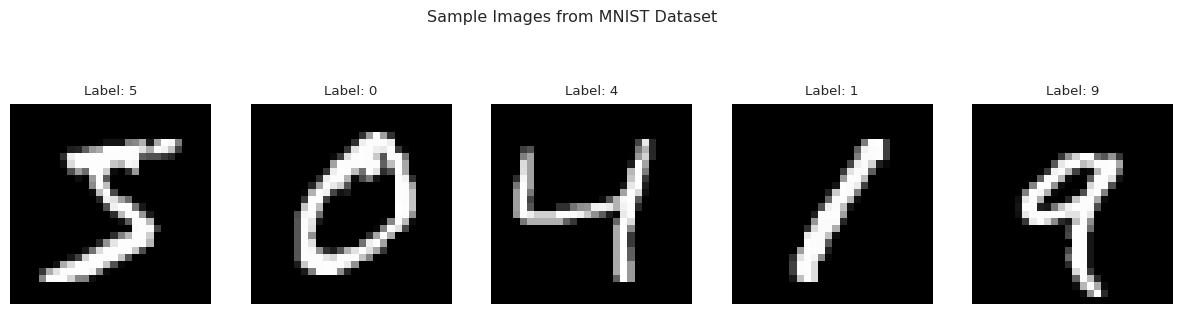

Original Data Dimensions: (70000, 784)
PCA Reduced Dimensions: (56000, 50)
PCA + t-SNE Reduced Dimensions: (56000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


PCA + UMAP Reduced Dimensions: (56000, 3)


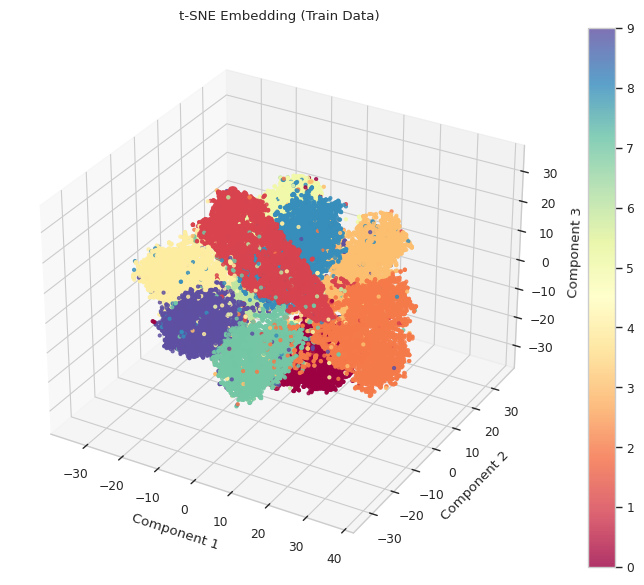

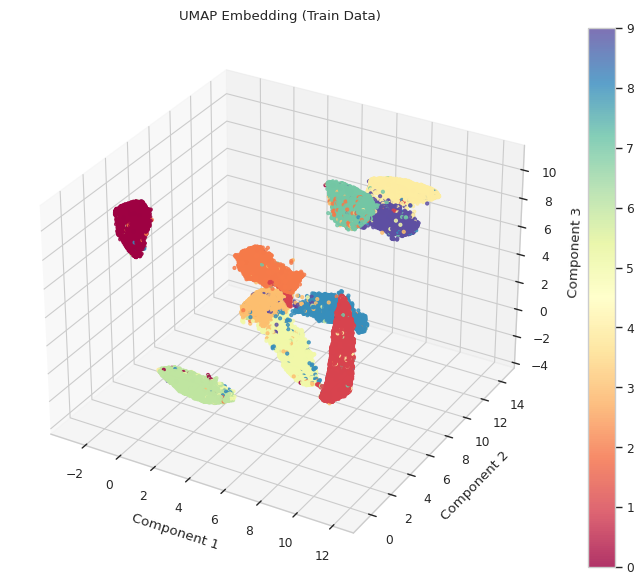

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:30:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (PCA + t-SNE): 0.0553
Classification Report (PCA + t-SNE):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.46      0.16      0.24      1600
           2       0.04      0.04      0.04      1380
           3       0.01      0.02      0.01      1433
           4       0.00      0.00      0.00      1295
           5       0.23      0.28      0.26      1273
           6       0.00      0.00      0.00      1396
           7       0.00      0.00      0.00      1503
           8       0.02      0.05      0.03      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.06     14000
   macro avg       0.08      0.06      0.06     14000
weighted avg       0.08      0.06      0.06     14000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:30:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (PCA + UMAP): 0.9597
Classification Report (PCA + UMAP):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.95      0.99      0.97      1600
           2       0.97      0.95      0.96      1380
           3       0.95      0.94      0.95      1433
           4       0.96      0.95      0.96      1295
           5       0.95      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.97      0.93      0.95      1357
           9       0.93      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:30:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (Original Data): 0.9781
Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.97      0.98      1503
           8       0.97      0.97      0.97      1357
           9       0.97      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



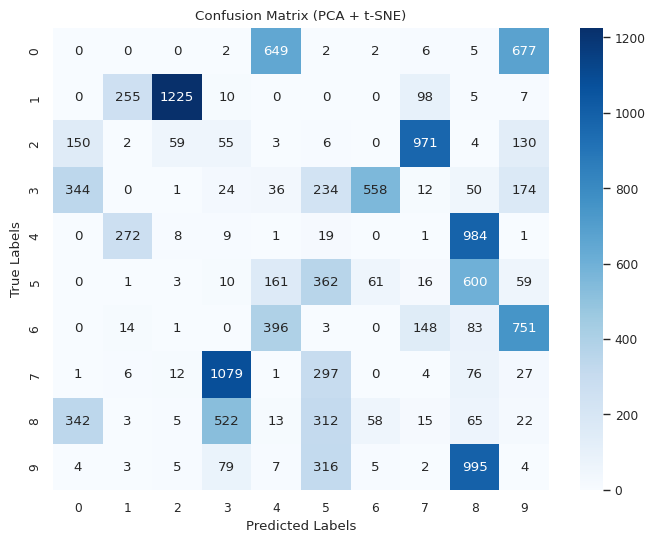

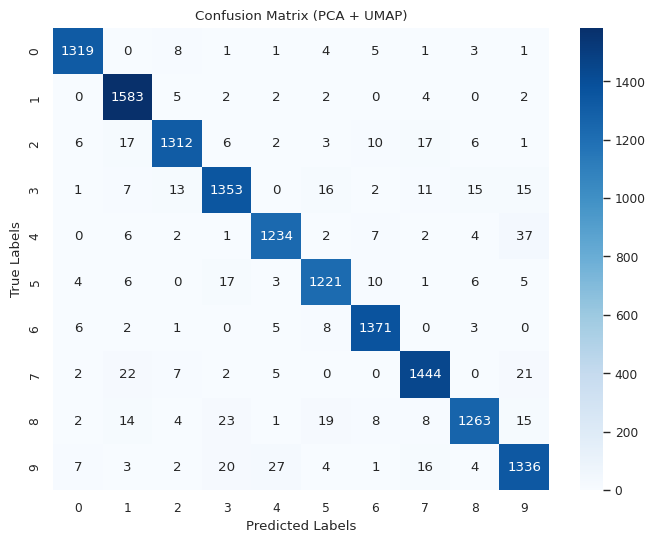

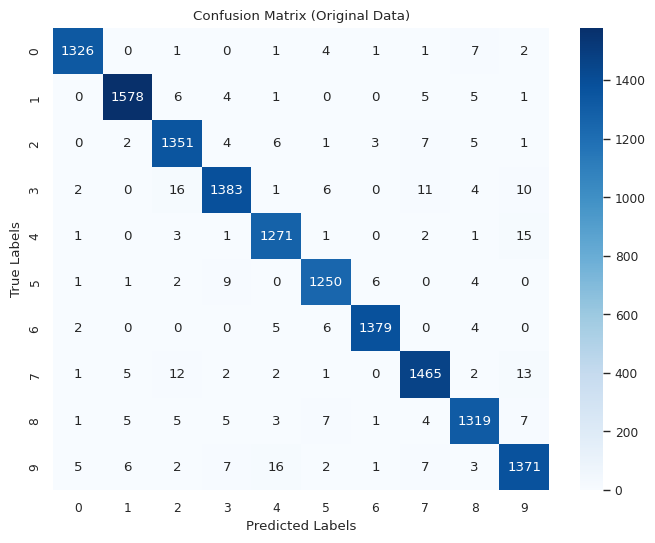

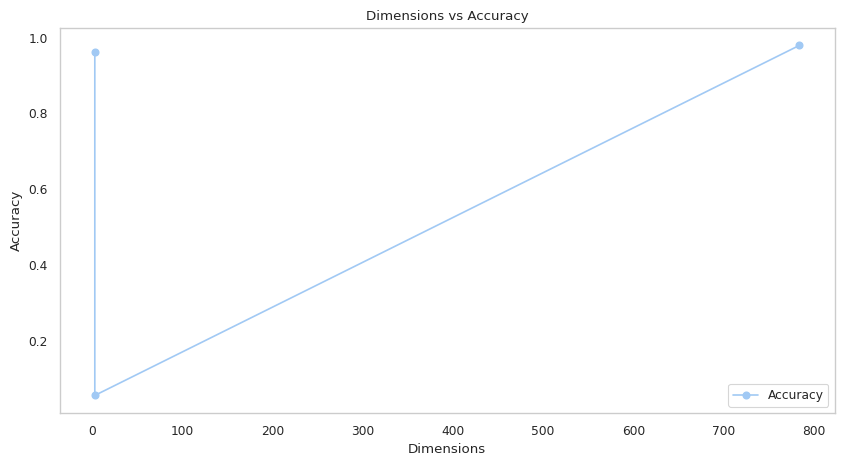

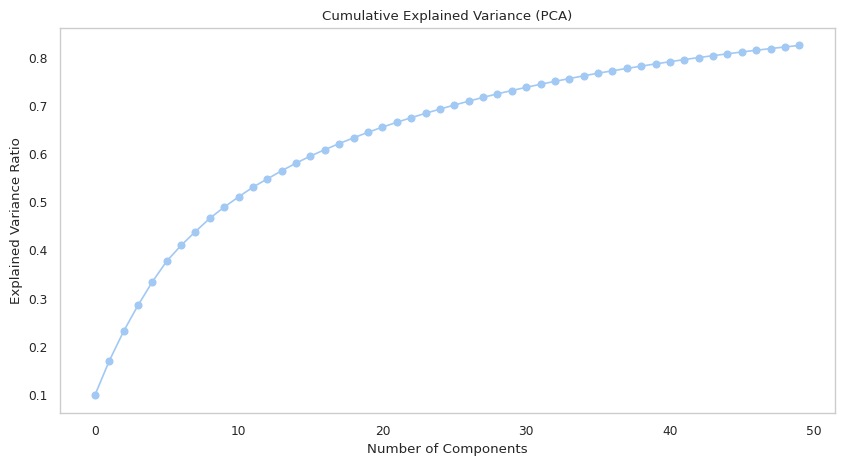


Summary of Model Accuracies:
           Model  Dimensions  Accuracy
0  Original Data         784  0.978071
1    PCA + t-SNE           3  0.055286
2     PCA + UMAP           3  0.959714


In [1]:
!pip install umap-learn xgboost
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(context="paper", style="whitegrid", palette="pastel")

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target.astype(int)

# Visualize sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Images from MNIST Dataset")
plt.show()

# Print original data dimensions
print("Original Data Dimensions:", X.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA
pca = PCA(n_components=50, random_state=42)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)
print("PCA Reduced Dimensions:", pca_train.shape)

# t-SNE on PCA
tsne = TSNE(n_components=3, random_state=42, init="random", learning_rate="auto")
tsne_train = tsne.fit_transform(pca_train)
tsne_test = tsne.fit_transform(pca_test)
print("PCA + t-SNE Reduced Dimensions:", tsne_train.shape)

# UMAP on PCA
umap_reducer = umap.UMAP(n_components=3, random_state=42)
umap_train = umap_reducer.fit_transform(pca_train)
umap_test = umap_reducer.transform(pca_test)
print("PCA + UMAP Reduced Dimensions:", umap_train.shape)

# 3D Visualization of t-SNE and UMAP embeddings
def plot_3d(X, y, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Spectral", s=5, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    fig.colorbar(scatter, ax=ax)
    plt.show()

plot_3d(tsne_train, y_train, "t-SNE Embedding (Train Data)")
plot_3d(umap_train, y_train, "UMAP Embedding (Train Data)")

# Model Training and Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy ({model_name}): {accuracy:.4f}")
    print(f"Classification Report ({model_name}):\n{classification_report(y_test, predictions)}")
    return accuracy, predictions

# Train models on reduced and original data
model_tsne = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
accuracy_tsne, tsne_pred = evaluate_model(model_tsne, tsne_train, y_train, tsne_test, y_test, "PCA + t-SNE")

model_umap = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
accuracy_umap, umap_pred = evaluate_model(model_umap, umap_train, y_train, umap_test, y_test, "PCA + UMAP")

model_original = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
accuracy_original, original_pred = evaluate_model(model_original, X_train, y_train, X_test, y_test, "Original Data")

# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix ({title})")
    plt.show()

plot_confusion_matrix(y_test, tsne_pred, "PCA + t-SNE")
plot_confusion_matrix(y_test, umap_pred, "PCA + UMAP")
plot_confusion_matrix(y_test, original_pred, "Original Data")

# Comparison of Accuracies
accuracies = pd.DataFrame({
    "Model": ["Original Data", "PCA + t-SNE", "PCA + UMAP"],
    "Dimensions": [X_train.shape[1], tsne_train.shape[1], umap_train.shape[1]],
    "Accuracy": [accuracy_original, accuracy_tsne, accuracy_umap]
})

# Accuracy vs Dimensions
plt.figure(figsize=(10, 5))
plt.plot(accuracies["Dimensions"], accuracies["Accuracy"], marker="o", label="Accuracy")
plt.title("Dimensions vs Accuracy")
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# Explained Variance Ratio (PCA)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()

# Final Summary
print("\nSummary of Model Accuracies:")
print(accuracies)


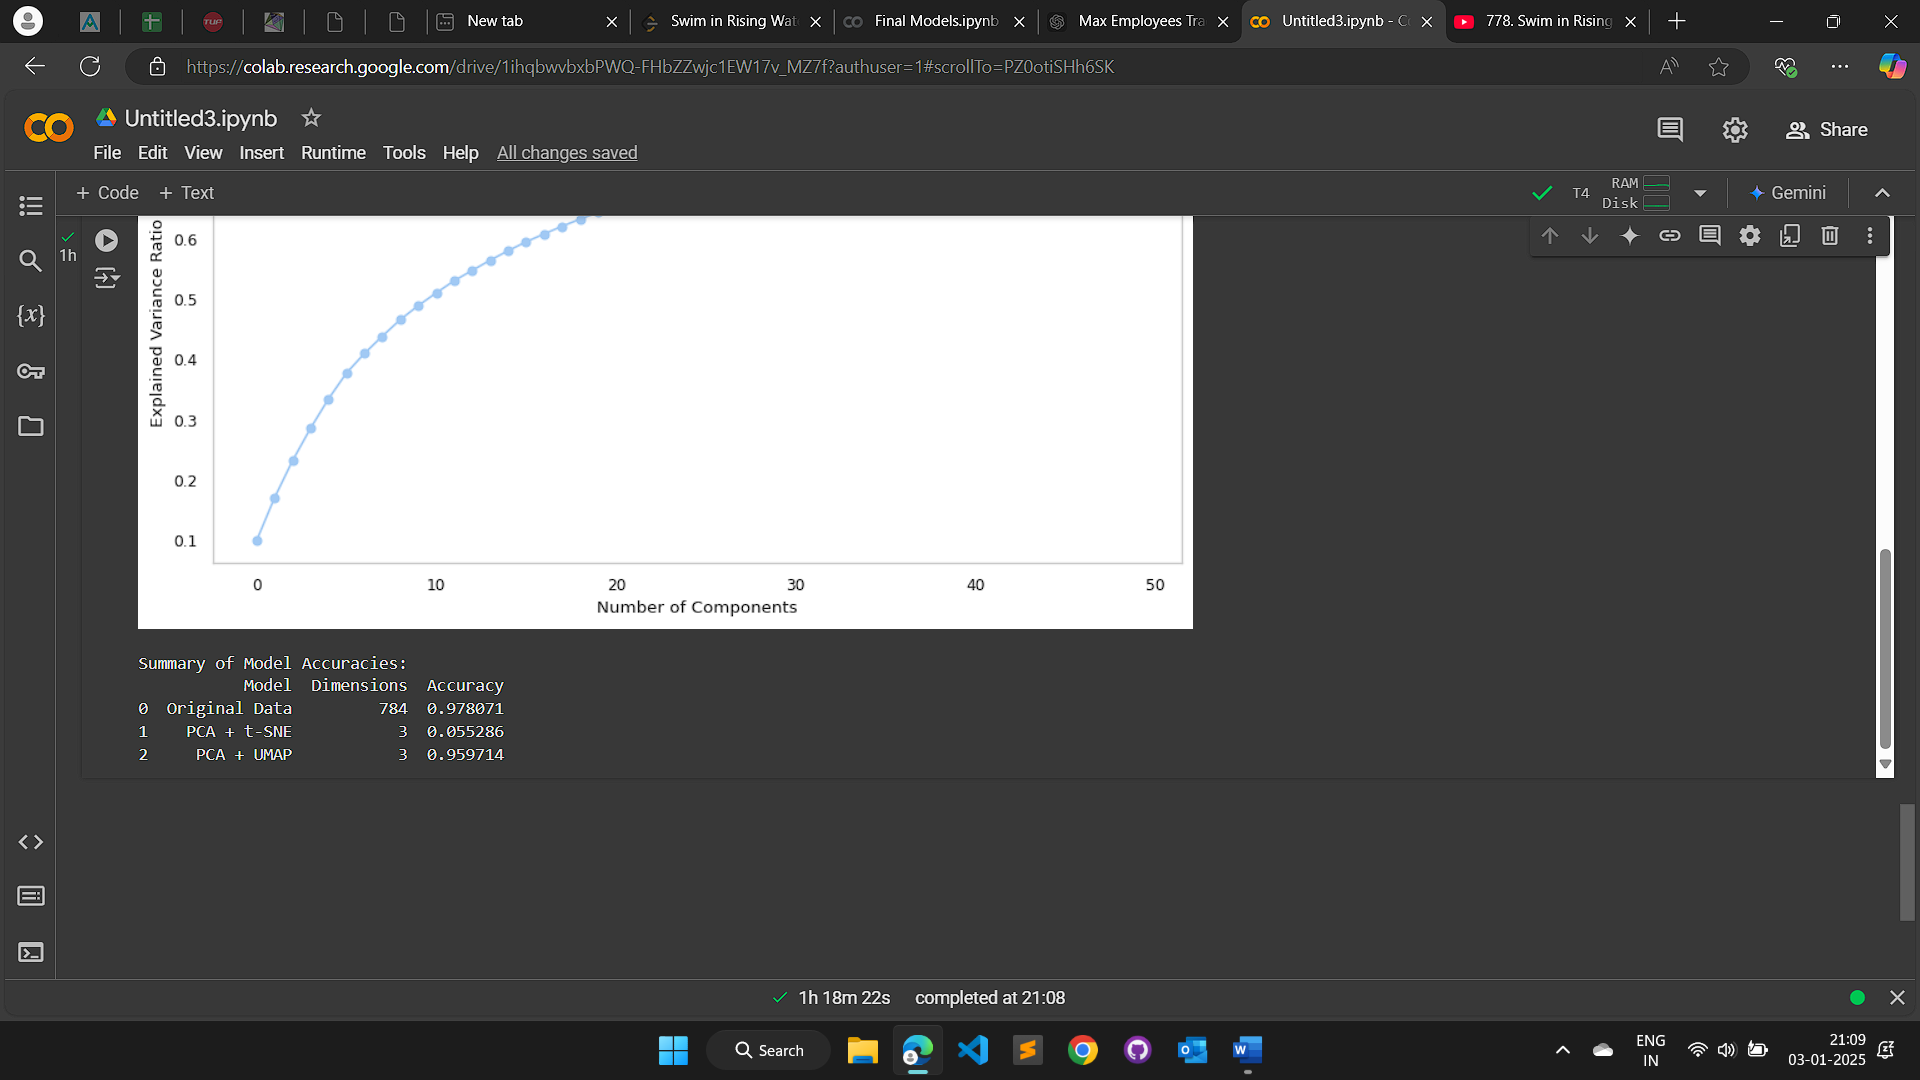